In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

In [2]:
# Read & Show dataset
df = pd.read_csv("/kaggle/input/salary-data-gender/Salary_Data_Gender.csv")

cols = df.columns.tolist() # Automaticaly read columns names 

table = df.copy()
table.head() # Show the dataset

,YearsExperience,Salary,Gender
0,1.1,39343.0,0
1,1.3,46205.0,0
2,1.5,37731.0,1
3,2.0,43525.0,0
4,2.2,39891.0,1


In [3]:
# convertation salary to binary type 0, 1
y_binary = (df["Salary"] > df["Salary"].median()).astype(int) 

X = df[["YearsExperience", "Gender"]]
y = y_binary

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

In [5]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(24, 2)
(6, 2)
(24,)
(6,)


In [6]:
# Standardize features
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_test_scaled = scaler.transform(X_test.values)

In [7]:
# train model 
model = LogisticRegression(max_iter=100)
model.fit(X_train, y_train)

LogisticRegression()

In [8]:
# model prediction and test
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 83.33%


In [9]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[2 0]
 [1 3]]

Classification Report:
               precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.75      0.86         4

    accuracy                           0.83         6
   macro avg       0.83      0.88      0.83         6
weighted avg       0.89      0.83      0.84         6



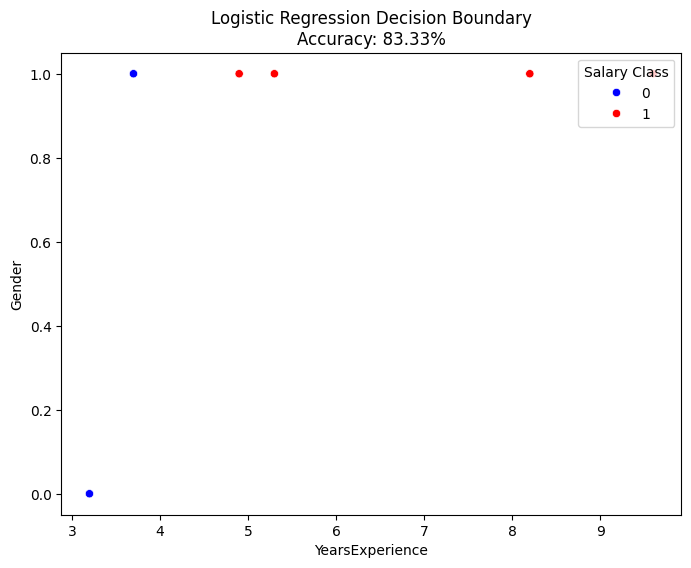

In [10]:
# Visualize the decision boundary with accuracy information
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=X_test["YearsExperience"], 
    y=X_test["Gender"],         
    hue=y_test,               
    palette={0: 'blue', 1: 'red'},
    marker='o'
)
plt.xlabel("YearsExperience")
plt.ylabel("Gender")
plt.title("Logistic Regression Decision Boundary\nAccuracy: {:.2f}%".format(accuracy * 100))
plt.legend(title="Salary Class", loc="upper right")
plt.show()


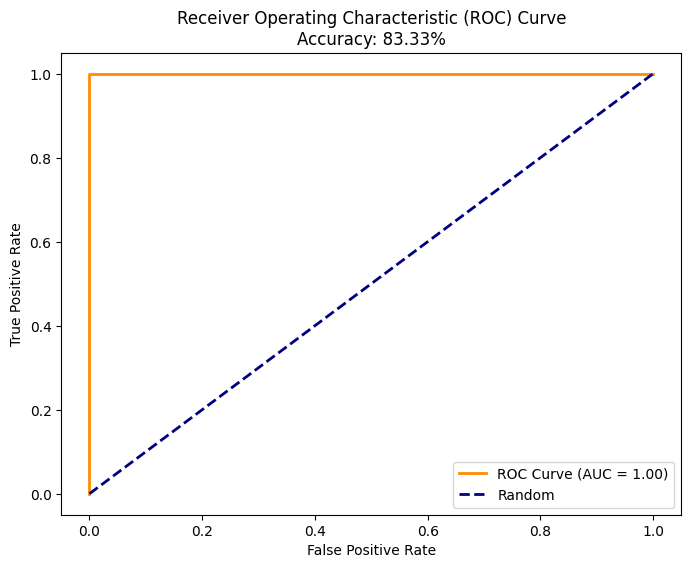

In [11]:
# Plot ROC Curve
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
 
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve\nAccuracy: {:.2f}%'.format(
    accuracy * 100))
plt.legend(loc="lower right")
plt.show()
